In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

It should include some film features and some rental features. Use the data from 2005.

In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query1 = ''' SELECT r.rental_date, film_id, f.title, count(film_id), f.special_features, f.rating, f.length, f.rental_rate FROM rental r
JOIN inventory i USING (inventory_id)
JOIN film f USING (film_id)
WHERE rental_date LIKE '%%2005%%'
GROUP BY film_id
ORDER BY rental_date; '''


data1 = pd.read_sql_query(query1, engine)
data1.head(10)

,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99
5,2005-05-24 23:08:07,613,MYSTIC TRUMAN,10,"Commentaries,Behind the Scenes",NC-17,92,0.99
6,2005-05-24 23:11:53,870,SWARM GOLD,26,"Trailers,Commentaries",PG-13,123,0.99
7,2005-05-24 23:31:46,510,LAWLESS VISION,16,"Deleted Scenes,Behind the Scenes",G,181,4.99
8,2005-05-25 00:00:40,565,MATRIX SNOWMAN,9,"Commentaries,Deleted Scenes,Behind the Scenes",PG-13,56,4.99
9,2005-05-25 00:02:21,396,HANGING DEEP,19,"Trailers,Commentaries,Deleted Scenes",G,62,4.99


Create a query to get the list of films and a boolean indicating if it was rented last month (mai 2005). This would be our target variable

In [3]:
query2 = ''' select distinct f.title,
CASE
WHEN (sum(case when date_format((r.rental_date), "%%M") = "May" 
and date_format((r.rental_date), "%%Y") = 2005
then True else False
END )) >= 1 then 1 else 0 end as rented_last_month
from film f
join inventory i on i.film_id = f.film_id
join rental r using(inventory_id)
group by f.title;'''

data2 =pd.read_sql_query(query2, engine)
data2

,title,rented_last_month
0,ACADEMY DINOSAUR,1
1,ACE GOLDFINGER,0
2,ADAPTATION HOLES,1
3,AFFAIR PREJUDICE,1
4,AFRICAN EGG,1
...,...,...
953,YOUNG LANGUAGE,0
954,YOUTH KICK,0
955,ZHIVAGO CORE,1
956,ZOOLANDER FICTION,1


In [4]:
data1.isna().sum()
data2.isna().sum()
data1.dtypes

rental_date         datetime64[ns]
film_id                      int64
title                       object
count(film_id)               int64
special_features            object
rating                      object
length                       int64
rental_rate                float64
dtype: object

In [5]:
display(data2)
display(data1)

,title,rented_last_month
0,ACADEMY DINOSAUR,1
1,ACE GOLDFINGER,0
2,ADAPTATION HOLES,1
3,AFFAIR PREJUDICE,1
4,AFRICAN EGG,1
...,...,...
953,YOUNG LANGUAGE,0
954,YOUTH KICK,0
955,ZHIVAGO CORE,1
956,ZOOLANDER FICTION,1


,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99
...,...,...,...,...,...,...,...,...
953,2005-07-27 07:02:30,485,JERSEY SASSY,6,"Deleted Scenes,Behind the Scenes",PG,60,4.99
954,2005-07-27 23:32:23,939,VERTIGO NORTHWEST,8,"Commentaries,Behind the Scenes",R,90,2.99
955,2005-07-28 17:02:32,904,TRAIN BUNCH,4,"Trailers,Deleted Scenes",R,71,4.99
956,2005-07-29 07:07:48,400,HARDLY ROBBERS,4,"Trailers,Behind the Scenes",R,72,2.99


merging the 2 datas extract from the queries

In [6]:
data = pd.merge(left = data1,
                right = data2,
                     how = 'inner', 
                        left_on = "title", 
                        right_on= "title")

display(data.dtypes)
data

rental_date          datetime64[ns]
film_id                       int64
title                        object
count(film_id)                int64
special_features             object
rating                       object
length                        int64
rental_rate                 float64
rented_last_month             int64
dtype: object

,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate,rented_last_month
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99,1
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99,1
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99,1
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99,1
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99,1
...,...,...,...,...,...,...,...,...,...
953,2005-07-27 07:02:30,485,JERSEY SASSY,6,"Deleted Scenes,Behind the Scenes",PG,60,4.99,0
954,2005-07-27 23:32:23,939,VERTIGO NORTHWEST,8,"Commentaries,Behind the Scenes",R,90,2.99,0
955,2005-07-28 17:02:32,904,TRAIN BUNCH,4,"Trailers,Deleted Scenes",R,71,4.99,0
956,2005-07-29 07:07:48,400,HARDLY ROBBERS,4,"Trailers,Behind the Scenes",R,72,2.99,0


the heat map to distinguish the multi correlations

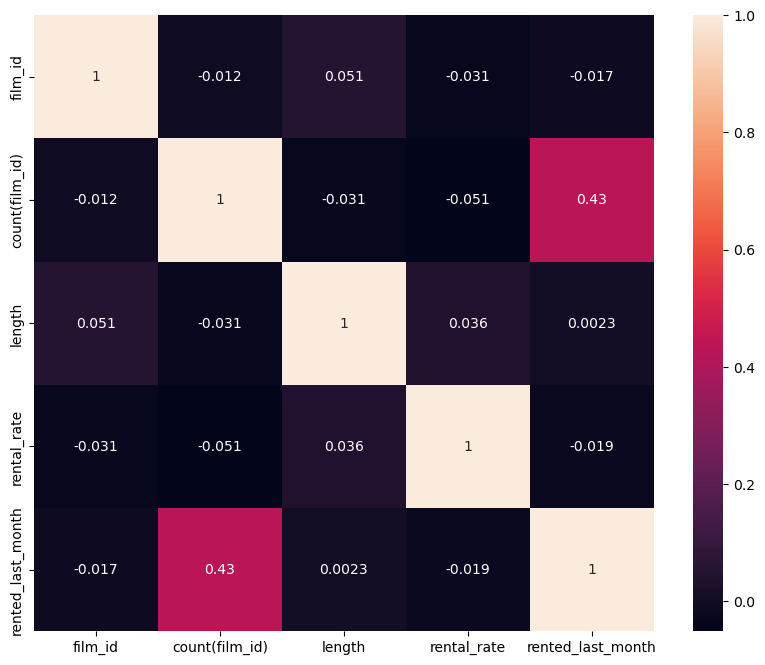

In [7]:


y = data[['rented_last_month']]

X = data.drop(['rented_last_month', 'title', 'rental_date', 'count(film_id)'], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [23]:
display(data)
X

,rental_date,film_id,title,count(film_id),special_features,rating,length,rental_rate,rented_last_month
0,2005-05-24 22:53:30,80,BLANKET BEVERLY,11,Trailers,G,148,2.99,1
1,2005-05-24 22:54:33,333,FREAKY POCUS,17,"Trailers,Behind the Scenes",R,126,2.99,1
2,2005-05-24 23:03:39,373,GRADUATE LORD,16,"Trailers,Behind the Scenes",G,156,2.99,1
3,2005-05-24 23:04:41,535,LOVE SUICIDES,20,"Trailers,Behind the Scenes",R,181,0.99,1
4,2005-05-24 23:05:21,450,IDOLS SNATCHERS,30,Trailers,NC-17,84,2.99,1
...,...,...,...,...,...,...,...,...,...
953,2005-07-27 07:02:30,485,JERSEY SASSY,6,"Deleted Scenes,Behind the Scenes",PG,60,4.99,0
954,2005-07-27 23:32:23,939,VERTIGO NORTHWEST,8,"Commentaries,Behind the Scenes",R,90,2.99,0
955,2005-07-28 17:02:32,904,TRAIN BUNCH,4,"Trailers,Deleted Scenes",R,71,4.99,0
956,2005-07-29 07:07:48,400,HARDLY ROBBERS,4,"Trailers,Behind the Scenes",R,72,2.99,0


,film_id,special_features,rating,length,rental_rate
0,80,Trailers,G,148,2.99
1,333,"Trailers,Behind the Scenes",R,126,2.99
2,373,"Trailers,Behind the Scenes",G,156,2.99
3,535,"Trailers,Behind the Scenes",R,181,0.99
4,450,Trailers,NC-17,84,2.99
...,...,...,...,...,...
953,485,"Deleted Scenes,Behind the Scenes",PG,60,4.99
954,939,"Commentaries,Behind the Scenes",R,90,2.99
955,904,"Trailers,Deleted Scenes",R,71,4.99
956,400,"Trailers,Behind the Scenes",R,72,2.99


In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
print('X_train is :', X_train.shape)
print('y_train is :', y_train.shape)
print('X_test is :', X_test.shape)
print('y_test is :', y_test.shape)

X_train is : (766, 5)
y_train is : (766, 1)
X_test is : (192, 5)
y_test is : (192, 1)


In [9]:
X_train_num = X_train.select_dtypes(include = np.number)
X_num = X.select_dtypes(include = np.number)
# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.columns = X_train_num.columns
X_train_norm.shape

(766, 3)

the distribution of the numericals and their shapes 

<Figure size 1400x2500 with 0 Axes>

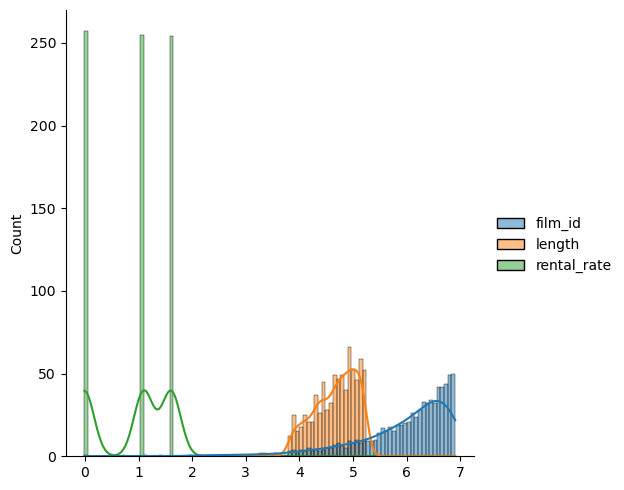

In [10]:
plt.figure(figsize = (14,25))
sns.displot(X_train_num.apply(np.log), bins=100, kde=True)

plt.show()

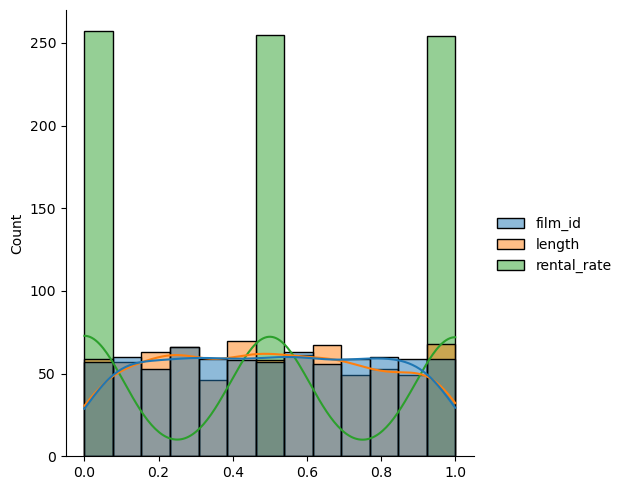

In [11]:
sns.displot(X_train_norm, kde=True)
plt.show()

let's have a view of our pair plot 

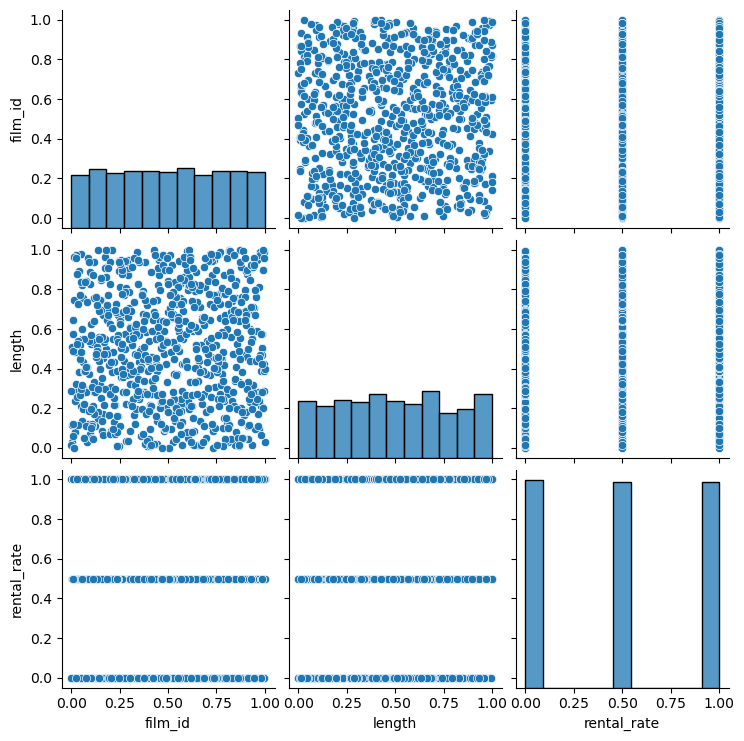

In [12]:
sns.pairplot(X_train_norm)

let's encode our categoricals !


In [24]:
# from sklearn.preprocessing import OneHotEncoder

# X_train_cat = X_train.select_dtypes(include = np.object)
# encoder = OneHotEncoder(drop='first').fit(X_train_cat)
# encoded = encoder.transform(X_train_cat).toarray()
# cols=[]
# for row in encoder.categories_:
#     for colname in row:
#         cols.append(colname)
        
# cols = encoder.get_feature_names(input_features=X_train_cat.columns)
# onehot_encoded = pd.DataFrame(encoded, columns=cols)
# display(onehot_encoded)
# display(X_train_norm)


X_train_categorical = X_train.select_dtypes(include = np.object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating', 'special_features'],
                             drop_first=True)
X_train_cat.head()

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_3688\1906303112.py:17: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include = np.object)


,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
102,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
515,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
133,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
# X_train_transformed = pd.concat([X_train_norm, onehot_encoded], axis=1)
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed

array([[0.11311311, 0.10791367, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.72372372, 0.46043165, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.8958959 , 0.79856115, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.75775776, 0.56834532, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.37337337, 0.51079137, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.40940941, 0.01438849, 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train) 

c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:

X_test_num = X_test.select_dtypes(include = np.number)

X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

# X_test_cat = X_test.select_dtypes(include = np.object)

# cols1=[]
# for row in encoder.categories_:
#     for colname in row:
#         cols1.append(colname)

# cols1 = encoder.get_feature_names(input_features=X_test_cat.columns)
# onehot_encoded1 = pd.DataFrame(encoded, columns=cols1)
# display(onehot_encoded1)
# display(X_test_norm)
# display(X_test_normalized)



X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rating', 'special_features'],
                            drop_first=True)

display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
X_train_cat.columns.equals(X_test_cat.columns)


C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_3688\1435594327.py:21: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)


[('rating_NC-17', 'rating_NC-17'),
 ('rating_PG', 'rating_PG'),
 ('rating_PG-13', 'rating_PG-13'),
 ('rating_R', 'rating_R'),
 ('special_features_Commentaries', 'special_features_Commentaries'),
 ('special_features_Commentaries,Behind the Scenes',
  'special_features_Commentaries,Behind the Scenes'),
 ('special_features_Commentaries,Deleted Scenes',
  'special_features_Commentaries,Deleted Scenes'),
 ('special_features_Commentaries,Deleted Scenes,Behind the Scenes',
  'special_features_Commentaries,Deleted Scenes,Behind the Scenes'),
 ('special_features_Deleted Scenes', 'special_features_Deleted Scenes'),
 ('special_features_Deleted Scenes,Behind the Scenes',
  'special_features_Deleted Scenes,Behind the Scenes'),
 ('special_features_Trailers', 'special_features_Trailers'),
 ('special_features_Trailers,Behind the Scenes',
  'special_features_Trailers,Behind the Scenes'),
 ('special_features_Trailers,Commentaries',
  'special_features_Trailers,Commentaries'),
 ('special_features_Trailer

True

In [31]:
# X_test_transformed = pd.concat([X_test_norm, onehot_encoded1], axis=1)
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)
X_test_transformed

array([[0.09409409, 0.55395683, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.94494494, 0.84892086, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.98798799, 0.66906475, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.91091091, 0.1294964 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.50650651, 0.48201439, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.84184184, 0.48201439, 0.5       , ..., 1.        , 0.        ,
        0.        ]])

In [32]:
list(X_train_num)==list(X_test_num)

True

In [33]:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Emmanuel\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.703125